# CIV1498 Project 2

## Predict MVP

Firstly, a logistic regression model is trained with pitching and batting datasets to predict a group of top players. </br>
Secondly, a linear regression model is applied to predict MVP voting scores and rank players.</br>
Thirdly, the players' rank from the model is compared with the MVP list.

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## The Data

In [2]:
# Combine annual csv files
MLB_players = pd.concat(map(pd.read_csv, ['2008_complete.csv','2009_complete.csv','2010_complete.csv',
                                          '2011_complete.csv','2012_complete.csv','2013_complete.csv',
                                          '2014_complete.csv','2015_complete.csv','2016_complete.csv', 
                                          '2017_complete.csv','2018_complete.csv','2019_complete.csv', 
                                          '2020_complete.csv','2021_complete.csv']), ignore_index=True)
MLB_players = MLB_players.iloc[: , 1:]
MLB_players

,full_name,player_id,year,player_age,league,rank,vote_points,1st_place,mvp_share,Total_WAR,...,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg
0,Albert Pujols,405395.0,2008,28,NL,1.0,369.0,18.0,0.82,9.24,...,0,37,54,104,8.4,16.2,0.357,0.653,0.462,1.114
1,Chase Utley,400284.0,2008,30,NL,14.0,30.0,0.0,0.07,9.04,...,4,33,104,64,14.7,9.1,0.292,0.535,0.379,0.914
2,Tim Lincecum,453311.0,2008,24,NL,23.0,9.0,0.0,0.02,8.00,...,1,0,32,5,39.5,6.2,0.157,0.200,0.198,0.398
3,Nick Markakis,455976.0,2008,25,AL,0.0,0.0,0.0,0.00,7.43,...,1,20,113,99,16.2,14.2,0.306,0.491,0.406,0.897
4,Chipper Jones,116706.0,2008,36,NL,12.0,44.0,0.0,0.10,7.33,...,1,22,61,90,11.4,16.9,0.364,0.574,0.470,1.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,Cody Bellinger,641355.0,2021,26,NL,0.0,0.0,0.0,0.00,-1.54,...,2,10,94,31,26.9,8.9,0.165,0.302,0.240,0.542
9717,Maikel Franco,596748.0,2021,29,AL,0.0,0.0,0.0,0.00,-1.56,...,0,11,67,20,16.6,5.0,0.210,0.355,0.253,0.609
9718,Jarred Kelenic,672284.0,2021,22,AL,0.0,0.0,0.0,0.00,-1.80,...,1,14,106,36,28.1,9.5,0.181,0.350,0.265,0.615
9719,Pat Valaika,642162.0,2021,29,AL,0.0,0.0,0.0,0.00,-1.86,...,0,5,76,16,27.0,5.7,0.201,0.290,0.249,0.539


# Train/Test split

In [3]:
# add a lebel for top players if they were voted as MVP candidates.
MLB_players['Top_players'] = MLB_players['vote_points'].apply(lambda x: 1 if x > 0 else 0)
MLB_players.head(5)

,full_name,player_id,year,player_age,league,rank,vote_points,1st_place,mvp_share,Total_WAR,...,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,Top_players
0,Albert Pujols,405395.0,2008,28,NL,1.0,369.0,18.0,0.82,9.24,...,37,54,104,8.4,16.2,0.357,0.653,0.462,1.114,1
1,Chase Utley,400284.0,2008,30,NL,14.0,30.0,0.0,0.07,9.04,...,33,104,64,14.7,9.1,0.292,0.535,0.379,0.914,1
2,Tim Lincecum,453311.0,2008,24,NL,23.0,9.0,0.0,0.02,8.00,...,0,32,5,39.5,6.2,0.157,0.200,0.198,0.398,1
3,Nick Markakis,455976.0,2008,25,AL,0.0,0.0,0.0,0.00,7.43,...,20,113,99,16.2,14.2,0.306,0.491,0.406,0.897,0
4,Chipper Jones,116706.0,2008,36,NL,12.0,44.0,0.0,0.10,7.33,...,22,61,90,11.4,16.9,0.364,0.574,0.470,1.044,1


In [4]:
train_top = MLB_players[MLB_players['year'] <= 2018]
test_top = MLB_players[MLB_players['year'] > 2018]
print('Train:', train_top.shape, 'Test:', test_top.shape)
print('Test/Train: {:.2f} %'.format(test_top.shape[0]/train_top.shape[0]*100))
print('Train Top players proportion: {:.2f} %'.format(train_top['Top_players'][train_top['Top_players'] == 1].shape[0] / train_top.shape[0] * 100))
print('Test Top players proportion: {:.2f} %'.format(test_top['Top_players'][test_top['Top_players'] == 1].shape[0] / test_top.shape[0] * 100))

Train: (7755, 28) Test: (1966, 28)
Test/Train: 25.35 %
Train Top players proportion: 6.09 %
Test Top players proportion: 6.05 %


# Annual data normalize

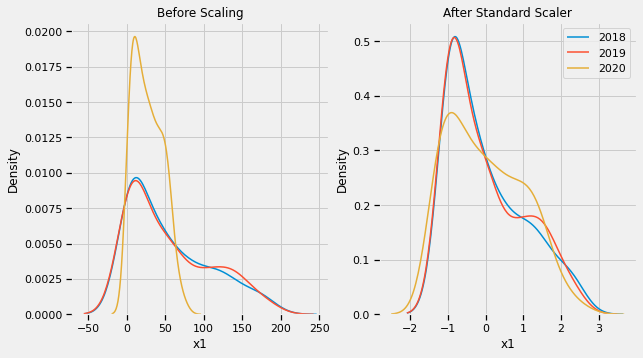

In [5]:
import random
from sklearn import preprocessing

np.random.seed(1)
df = pd.DataFrame({
    'x1': random.sample(MLB_players[MLB_players['year'] == 2018].b_total_hits.tolist(), 200),
    'x2': random.sample(MLB_players[MLB_players['year'] == 2019].b_total_hits.tolist(), 200),
    'x3': random.sample(MLB_players[MLB_players['year'] == 2020].b_total_hits.tolist(), 200)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2 , label="2018")
sns.kdeplot(scaled_df['x2'], ax=ax2 , label="2019")
sns.kdeplot(scaled_df['x3'], ax=ax2 , label="2020")

ax2.legend()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to use for modelling
num_features = ['player_age', 'WAR_bat', 'WAR_pit', 'b_ab', 'b_total_pa', 'b_total_hits', 'b_single', 'b_double', 'b_triple', 
                'b_home_run', 'b_strikeout', 'b_walk', 'batting_avg', 'slg_percent', 'on_base_percent']

# Define categorical features to use for modelling
cat_features = ['full_name', 'Top_players' , 'year' , 'league' , 'vote_points', 'rank']

# Fit scaler (basically get the mean and stdev) for the data
def Annual_scaler(df):
    
    x=[]
    for year in df.year.unique():
        scaler = StandardScaler()
        scaler.fit(df[num_features][df['year'] == year])
    
        scaled = df[num_features][df['year']== year].copy()
        scaled.iloc[:, :] = scaler.transform(scaled)
        x.append(scaled)

    return pd.concat(x)

def create_features(df):
    """Create a feature set from taxi ride dataframe df."""
    
    scaled = df[num_features].copy()
    
    # Convert numeric features to standard units
    df_scaled = Annual_scaler(df).reset_index()
    
    # Convert categorical features
    categoricals = df[cat_features].copy().reset_index()
    
    return pd.concat([categoricals , df_scaled], axis=1).drop(columns = ['index'])

# Let's test our function
create_features(train_top)

,full_name,Top_players,year,league,vote_points,rank,player_age,WAR_bat,WAR_pit,b_ab,...,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,batting_avg,slg_percent,on_base_percent
0,Albert Pujols,1,2008,NL,369.0,1.0,-0.216228,5.113281,-0.233701,1.454798,...,2.160931,1.708355,2.463232,-0.628898,3.293992,0.211641,3.339904,1.778506,2.289562,2.004121
1,Chase Utley,1,2008,NL,30.0,14.0,0.246142,4.991611,-0.233701,1.869195,...,1.988735,1.524875,2.227761,1.394390,2.857373,1.482129,1.692828,0.857393,1.399805,1.038973
2,Tim Lincecum,1,2008,NL,9.0,23.0,-1.140968,-0.398371,7.863658,-0.811907,...,-0.869725,-0.834159,-0.911858,-0.123076,-0.744741,-0.347374,-0.736609,-1.055687,-1.126200,-1.065746
3,Nick Markakis,0,2008,AL,0.0,0.0,-0.909783,4.012168,-0.233701,1.809282,...,2.074833,1.891835,2.777194,-0.123076,1.438358,1.710817,3.134019,1.055787,1.068031,1.352937
4,Chipper Jones,1,2008,NL,44.0,12.0,1.633252,3.951333,-0.233701,1.030415,...,1.696001,1.891835,0.893423,-0.123076,1.656668,0.389509,2.763427,1.877703,1.693877,2.097147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,Homer Bailey,0,2018,NL,0.0,0.0,0.982247,-0.528404,-1.796854,-1.022566,...,-0.985675,-0.959128,-0.963402,-0.626616,-0.819749,-0.937876,-0.878020,-1.378859,-1.652023,-1.808594
7751,Magneuris Sierra,0,2018,NL,0.0,0.0,-1.663658,-1.526259,-0.250906,-0.397741,...,-0.517006,-0.314326,-0.705334,-0.626616,-0.819749,-0.368895,-0.660518,-0.312430,-0.940129,-0.632962
7752,Hunter Dozier,0,2018,AL,0.0,0.0,-0.340705,-1.711047,-0.250906,0.712484,...,0.514067,0.389094,0.671030,1.560298,0.381209,1.162976,0.122490,0.242114,0.424335,0.072417
7753,Alcides Escobar,0,2018,AL,0.0,0.0,0.982247,-1.815761,-0.250906,1.347636,...,1.057724,1.385605,0.929098,1.013569,-0.383037,0.397041,0.339992,0.270552,-0.183741,0.037148


# 2. Linear regression - predict MVP vote points directly

In [7]:
# X_train drop columns related to MVP voting and string column 
X_train_MVP = create_features(train_top).drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' , 'Top_players','league'])
y_train_MVP = create_features(train_top)['vote_points']

In [8]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(X_train_MVP, y_train_MVP)
y_train_MVP_pred = linear_model.predict(X_train_MVP)

In [9]:
def rmse(errors):
    """Return the root mean squared error."""
    return np.sqrt(np.mean(errors ** 2))

train_rmse = rmse(y_train_MVP- y_train_MVP_pred)

# Print score
print('Linear regression model validation RMSE: {0:0.2f} points'.format(train_rmse))

Linear regression model validation RMSE: 25.60 points


## Linear regression - TEST

The top 6 players in the model only have 3 of 4 real MVPs though RMSE is small. 

In [10]:
X_test_MVP = create_features(test_top).drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' , 'Top_players','league'])
y_test_MVP = create_features(test_top)['vote_points']

y_test_MVP_pred = linear_model.predict(X_test_MVP)

In [11]:
test_rmse = rmse(y_test_MVP - y_test_MVP_pred)

# Print score
print('Linear regression model validation RMSE: {0:0.2f} points'.format(test_rmse))

Linear regression model validation RMSE: 26.83 points


In [12]:
MVP_linear_pred = pd.concat([test_top.reset_index(), pd.DataFrame(y_test_MVP_pred)], axis=1).rename(columns={0: 'Pred_points'})
MVP_linear_pred.head(5)

,index,full_name,player_id,year,player_age,league,rank,vote_points,1st_place,mvp_share,...,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,Top_players,Pred_points
0,7755,Alex Bregman,608324.0,2019,25,AL,2.0,335.0,13.0,0.80,...,83,119,12.0,17.2,0.296,0.592,0.423,1.015,1,110.966783
1,7756,Cody Bellinger,641355.0,2019,24,NL,1.0,362.0,19.0,0.86,...,108,95,16.3,14.4,0.305,0.629,0.405,1.034,1,108.390994
2,7757,Jacob deGrom,594798.0,2019,31,NL,10.0,44.0,0.0,0.10,...,19,4,27.1,5.7,0.200,0.323,0.243,0.566,1,15.511182
3,7758,Marcus Semien,543760.0,2019,29,AL,3.0,228.0,0.0,0.54,...,102,87,13.7,11.6,0.285,0.522,0.369,0.892,1,74.626276
4,7759,Mike Trout,545361.0,2019,28,AL,1.0,355.0,17.0,0.85,...,120,110,20.0,18.3,0.291,0.645,0.438,1.083,1,104.441531


In [13]:
# Top 5 predicted vote points contain 2 MVPs
MVP_linear_pred[['full_name','rank','year','vote_points','Pred_points', 'league']].sort_values(by=['Pred_points'], ascending=False).head(5)

,full_name,rank,year,vote_points,Pred_points,league
723,Freddie Freeman,1.0,2020,410.0,113.424038,NL
1250,Vladimir Guerrero Jr.,2.0,2021,269.0,111.702455,AL
0,Alex Bregman,2.0,2019,335.0,110.966783,AL
1249,Juan Soto,2.0,2021,274.0,110.334602,NL
1,Cody Bellinger,1.0,2019,362.0,108.390994,NL


In [14]:
MVP_linear_pred[['full_name','rank','year','vote_points','Pred_points', 'league']].sort_values(by=['Pred_points'], ascending=False).drop_duplicates(['year','league']).sort_values(by=['year', 'league'], ascending=False)

,full_name,rank,year,vote_points,Pred_points,league
1249,Juan Soto,2.0,2021,274.0,110.334602,NL
1250,Vladimir Guerrero Jr.,2.0,2021,269.0,111.702455,AL
723,Freddie Freeman,1.0,2020,410.0,113.424038,NL
725,DJ LeMahieu,3.0,2020,230.0,89.300060,AL
1,Cody Bellinger,1.0,2019,362.0,108.390994,NL
0,Alex Bregman,2.0,2019,335.0,110.966783,AL


# 3.1 Logistic regression - find top players

In [15]:
# X_train drop columns related to MVP voting and string column 
X_train_top = create_features(train_top).drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank'  ,'league'])
y_train_top = create_features(train_top)['Top_players']

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(fit_intercept=True)
log_model.fit(X_train_top, y_train_top)

LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [18]:
y_train_top_pred = log_model.predict(X_train_top)
y_train_top_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
pd.DataFrame(y_train_top_pred).value_counts()

0    7344
1     411
dtype: int64

In [20]:
accuracy_score(y_train_top,y_train_top_pred)

0.973565441650548

In [21]:
cm = confusion_matrix(y_train_top,y_train_top_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[7211   72]
 [ 133  339]]

True Positives(TP) =  339

True Negatives(TN) =  7211

False Positives(FP) =  72

False Negatives(FN) =  133


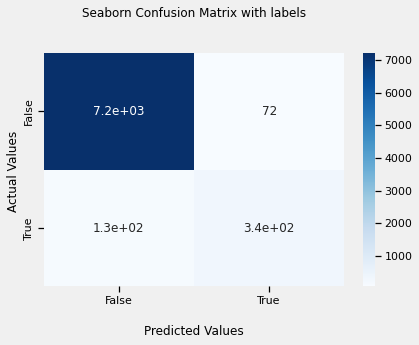

In [22]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_ylim(2.0, 0)
## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1 = f1_score(y_train_top,y_train_top_pred,average='macro')
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('f1 : {0:0.4f}'.format(f1))

Precision : 0.8248
Recall or Sensitivity : 0.7182
f1 : 0.8769


## Logistic regression - TEST

In [24]:
X_test_top = create_features(test_top).drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' , 'Top_players','league'])
y_test_top = create_features(test_top)['Top_players']

y_test_top_pred = log_model.predict(X_test_top)
y_test_top_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [25]:
pd.DataFrame(y_test_top_pred).value_counts()

0    1858
1     108
dtype: int64

In [26]:
accuracy_score(y_test_top,y_test_top_pred)

0.9699898270600203

In [27]:
cm = confusion_matrix(y_test_top,y_test_top_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[1823   24]
 [  35   84]]

True Positives(TP) =  84

True Negatives(TN) =  1823

False Positives(FP) =  24

False Negatives(FN) =  35


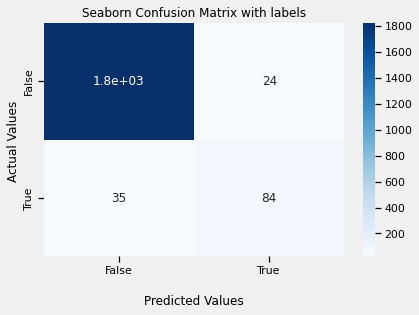

In [28]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_ylim(2.0, 0)
## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1 = f1_score(y_test_top,y_test_top_pred,average='macro')
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('f1 : {0:0.4f}'.format(f1))

Precision : 0.7778
Recall or Sensitivity : 0.7059
f1 : 0.8621


# 3.2 Linear regression 2 
## predict MVP vote points from predicted top players


In [30]:
# Prepare the predicted top players dataframe
df = pd.concat([create_features(train_top.reset_index()), pd.DataFrame(y_train_top_pred)], axis=1).rename(columns={0: 'Pred_Top_players'})

# Build a linear model to predict MVPs from top players
X_train_MVP2 = df[df['Pred_Top_players'] == 1].drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' , 'Pred_Top_players','league'])
y_train_MVP2 = df[df['Pred_Top_players'] == 1]['vote_points']

In [31]:
linear_model2 = LinearRegression(fit_intercept=True)

linear_model2.fit(X_train_MVP2, y_train_MVP2)
y_train_MVP_pred2 = linear_model2.predict(X_train_MVP2)

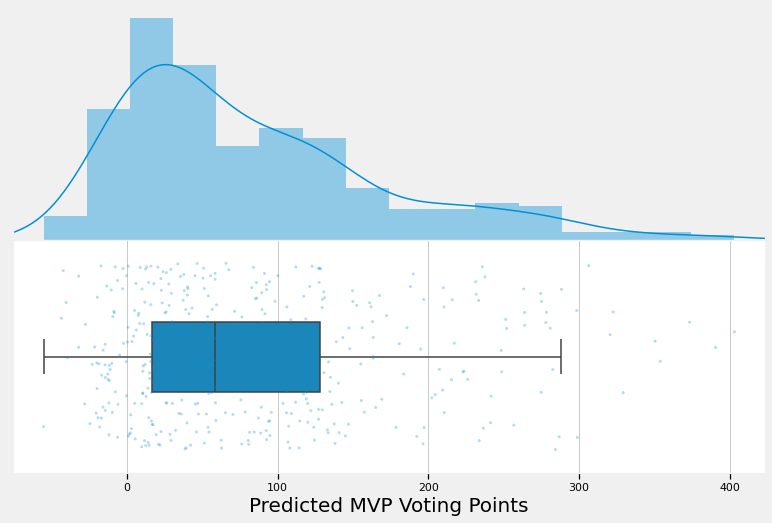

In [32]:
# Examine target variable WAR using three different plot types
fig, axs = plt.subplots(figsize=(12, 8), nrows=2)

sns.distplot(
    y_train_MVP_pred2, 
    ax=axs[0]
)
sns.stripplot(
    y_train_MVP_pred2, 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    y_train_MVP_pred2,
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(y_train_MVP_pred2) * 0.05
xmin = np.min(y_train_MVP_pred2) - spacer
xmax = np.max(y_train_MVP_pred2) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].set_xlabel('Predicted MVP Voting Points', fontsize=20)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white .artists[0]
axs[1].set_facecolor('white')

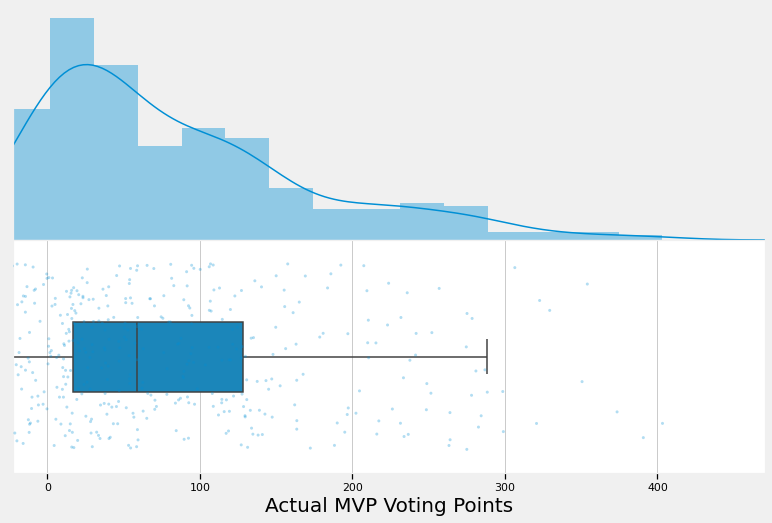

In [33]:
# Examine target variable WAR using three different plot types
fig, axs = plt.subplots(figsize=(12, 8), nrows=2)

sns.distplot(
    y_train_MVP_pred2, 
    ax=axs[0]
)
sns.stripplot(
    y_train_MVP_pred2, 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    y_train_MVP_pred2,
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(y_train_MVP) * 0.05
xmin = np.min(y_train_MVP) - spacer
xmax = np.max(y_train_MVP) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].set_xlabel('Actual MVP Voting Points', fontsize=20)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white .artists[0]
axs[1].set_facecolor('white')

In [34]:
train_rmse2 = rmse(y_train_MVP2- y_train_MVP_pred2)
print("The mean squared error (MSE) on train set: {:.4f}".format(train_rmse2))

The mean squared error (MSE) on train set: 63.3595


In [35]:
# Explore the coefficients for each of the independent attributes
 
for idx, col_name in enumerate(X_train_MVP2.columns):
    print("The coefficient for {} is {:.2f}".format(col_name, linear_model2.coef_[idx]))

The coefficient for player_age is -10.27
The coefficient for WAR_bat is 42.73
The coefficient for WAR_pit is 47.79
The coefficient for b_ab is -438.14
The coefficient for b_total_pa is 231.49
The coefficient for b_total_hits is 330.09
The coefficient for b_single is -71.79
The coefficient for b_double is -0.54
The coefficient for b_triple is 7.21
The coefficient for b_home_run is 54.60
The coefficient for b_strikeout is -12.94
The coefficient for b_walk is -12.90
The coefficient for batting_avg is 6.21
The coefficient for slg_percent is -59.41
The coefficient for on_base_percent is 24.57


## Linear regression 2 - TEST
find 3 of 4 MVP in top 5 players

In [36]:
# Prepare the predicted top players dataframe
df = pd.concat([create_features(test_top.reset_index()), pd.DataFrame(y_test_top_pred)], axis=1).rename(columns={0: 'Pred_Top_players'})
df = df[df['Pred_Top_players'] == 1]

# Build a linear model to predict MVPs from top players
X_test_MVP2 = df.drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' , 'Pred_Top_players','league'])
y_test_MVP2 = df['vote_points']

In [37]:
y_test_MVP_pred2 = linear_model2.predict(X_test_MVP2)

test_rmse2 = rmse(y_test_MVP2- y_test_MVP_pred2)
print("The mean squared error (MSE) on test set: {:.4f}".format(test_rmse2))

The mean squared error (MSE) on test set: 61.2733


In [38]:
MVP_linear_pred2 = pd.concat([df.reset_index(), pd.DataFrame(y_test_MVP_pred2)], axis=1).rename(columns={0: 'Pred_points'})
MVP_linear_pred2.head(5)

,index,full_name,Top_players,year,league,vote_points,rank,player_age,WAR_bat,WAR_pit,...,b_double,b_triple,b_home_run,b_strikeout,b_walk,batting_avg,slg_percent,on_base_percent,Pred_Top_players,Pred_points
0,0,Alex Bregman,1,2019,AL,335.0,2.0,-0.862177,4.805955,-0.274132,...,2.183706,0.540041,2.917530,0.542834,4.231692,1.104353,1.614354,1.680921,1,266.109899
1,1,Cody Bellinger,1,2019,NL,362.0,1.0,-1.133652,4.605265,-0.274132,...,1.925622,1.124614,3.468334,1.085938,3.188043,1.229748,1.868904,1.472809,1,273.743732
2,2,Jacob deGrom,1,2019,NL,44.0,10.0,0.766672,-0.146364,8.009164,...,-0.827275,-0.629104,-0.662694,-0.847514,-0.769125,-0.233190,-0.236293,-0.400193,1,56.311558
3,3,Marcus Semien,1,2019,AL,228.0,3.0,0.223722,4.451796,-0.274132,...,2.699874,3.462904,2.183125,0.955593,2.840160,0.951093,1.132773,1.056586,1,168.768327
4,4,Mike Trout,1,2019,AL,355.0,1.0,-0.047752,4.174372,-0.274132,...,1.323426,0.540041,3.284732,1.346629,3.840324,1.034689,1.978980,1.854347,1,203.872261


In [39]:
# Top 5 predicted vote points contain 3 MVPs
league_MVPpred = MVP_linear_pred2[['full_name','rank','year','vote_points','Pred_points','league']].sort_values(by=['Pred_points'], ascending=False)
league_MVPpred.head(5)

,full_name,rank,year,vote_points,Pred_points,league
44,Freddie Freeman,1.0,2020,410.0,331.195206,NL
68,Shohei Ohtani,1.0,2021,420.0,330.887081,AL
73,Vladimir Guerrero Jr.,2.0,2021,269.0,311.338649,AL
50,Marcell Ozuna,6.0,2020,167.0,280.242718,NL
1,Cody Bellinger,1.0,2019,362.0,273.743732,NL


In [40]:
# Predicted annual MVP in each league.
league_MVPpred.drop_duplicates(['year','league']).sort_values(by=['year', 'league'], ascending=False)

,full_name,rank,year,vote_points,Pred_points,league
72,Juan Soto,2.0,2021,274.0,233.182142,NL
68,Shohei Ohtani,1.0,2021,420.0,330.887081,AL
44,Freddie Freeman,1.0,2020,410.0,331.195206,NL
46,DJ LeMahieu,3.0,2020,230.0,219.984850,AL
1,Cody Bellinger,1.0,2019,362.0,273.743732,NL
0,Alex Bregman,2.0,2019,335.0,266.109899,AL


In [41]:
# all of 5 MVPs and their info.
MVP_linear_pred2[MVP_linear_pred2['rank']==1]

,index,full_name,Top_players,year,league,vote_points,rank,player_age,WAR_bat,WAR_pit,...,b_double,b_triple,b_home_run,b_strikeout,b_walk,batting_avg,slg_percent,on_base_percent,Pred_Top_players,Pred_points
1,1,Cody Bellinger,1,2019,NL,362.0,1.0,-1.133652,4.605265,-0.274132,...,1.925622,1.124614,3.468334,1.085938,3.188043,1.229748,1.868904,1.472809,1,273.743732
4,4,Mike Trout,1,2019,AL,355.0,1.0,-0.047752,4.174372,-0.274132,...,1.323426,0.540041,3.284732,1.346629,3.840324,1.034689,1.978980,1.854347,1,203.872261
44,723,Freddie Freeman,1,2020,NL,410.0,1.0,0.726098,3.566534,0.061680,...,4.112961,0.653591,2.055659,0.422799,3.519087,1.767519,2.050412,2.309486,1,331.195206
68,1245,Shohei Ohtani,1,2021,AL,420.0,1.0,-0.434366,2.594339,4.202531,...,1.452681,4.998118,3.848635,2.924387,3.369279,0.670489,1.781339,1.128948,1,330.887081
84,1262,Bryce Harper,1,2021,NL,348.0,1.0,0.115069,3.178130,-0.247176,...,2.960520,0.062586,2.734109,1.710077,3.549929,1.356102,1.941175,1.743882,1,185.766228


# 3.3 Linear regression 3 - reducing modeling features 

In [42]:
# Define numerical features to use for modelling
num_features_rf = [ 'WAR_bat', 'WAR_pit','batting_avg', 'b_home_run', 'b_total_hits', 'on_base_percent']

#'player_age', 'WAR_bat', 'WAR_pit', 'b_ab', 'b_total_pa', 'b_total_hits', 'b_single', 'b_double', 'b_triple',
#'b_home_run', 'b_strikeout', 'b_walk', 'batting_avg', 'slg_percent', 'on_base_percent',  'b_game', 'r_run'


# Define categorical features to use for modelling
cat_features_rf = ['full_name', 'Top_players' , 'year' , 'league' , 'vote_points', 'rank']

# Fit scaler (basically get the mean and stdev) for the data
def Annual_scaler_rf(df):
    
    x=[]
    for year in df.year.unique():
        scaler = StandardScaler()
        scaler.fit(df[num_features_rf][df['year'] == year])
    
        scaled = df[num_features_rf][df['year']== year].copy()
        scaled.iloc[:, :] = scaler.transform(scaled)
        x.append(scaled)

    return pd.concat(x)

def create_features_rf(df):
    """Create a feature set from taxi ride dataframe df."""
    
    scaled = df[num_features_rf].copy()
    
    # Convert numeric features to standard units
    df_scaled = Annual_scaler_rf(df).reset_index()
    
    # Convert categorical features
    categoricals = df[cat_features_rf].copy().reset_index()
    
    return pd.concat([categoricals , df_scaled], axis=1).drop(columns = ['index'])

# Let's test our function
create_features_rf(train_top).head(5)

,full_name,Top_players,year,league,vote_points,rank,WAR_bat,WAR_pit,batting_avg,b_home_run,b_total_hits,on_base_percent
0,Albert Pujols,1,2008,NL,369.0,1.0,5.113281,-0.233701,1.778506,3.293992,2.160931,2.004121
1,Chase Utley,1,2008,NL,30.0,14.0,4.991611,-0.233701,0.857393,2.857373,1.988735,1.038973
2,Tim Lincecum,1,2008,NL,9.0,23.0,-0.398371,7.863658,-1.055687,-0.744741,-0.869725,-1.065746
3,Nick Markakis,0,2008,AL,0.0,0.0,4.012168,-0.233701,1.055787,1.438358,2.074833,1.352937
4,Chipper Jones,1,2008,NL,44.0,12.0,3.951333,-0.233701,1.877703,1.656668,1.696001,2.097147


In [43]:
# Prepare the predicted top players dataframe
df = pd.concat([create_features_rf(train_top.reset_index()), pd.DataFrame(y_train_top_pred)], axis=1).rename(columns={0: 'Pred_Top_players'})

# Build a linear model to predict MVPs from top players
X_train_MVP_rf = df[df['Pred_Top_players'] == 1].drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' , 'Pred_Top_players','league'])
y_train_MVP_rf = df[df['Pred_Top_players'] == 1]['vote_points']

In [44]:
linear_model_rf = LinearRegression(fit_intercept=True)

linear_model_rf.fit(X_train_MVP_rf, y_train_MVP_rf)
y_train_MVP_pred_rf = linear_model_rf.predict(X_train_MVP_rf)

In [45]:
train_rmse_rf = rmse(y_train_MVP_rf- y_train_MVP_pred_rf)
print("The mean squared error (MSE) on train set: {:.4f}".format(train_rmse_rf))

The mean squared error (MSE) on train set: 68.1439


In [46]:
# Explore the coefficients for each of the independent attributes
 
for idx, col_name in enumerate(X_train_MVP_rf.columns):
    print("The coefficient for {} is {:.2f}".format(col_name, linear_model_rf.coef_[idx]))

The coefficient for WAR_bat is 52.33
The coefficient for WAR_pit is 78.31
The coefficient for batting_avg is 38.39
The coefficient for b_home_run is 38.53
The coefficient for b_total_hits is 70.38
The coefficient for on_base_percent is 47.90


## Linear regression 3 - TEST
find 3 of 6 MVP in top 5 players

In [47]:
# Prepare the predicted top players dataframe
df = pd.concat([create_features_rf(test_top.reset_index()), pd.DataFrame(y_test_top_pred)], axis=1).rename(columns={0: 'Pred_Top_players'})
df = df[df['Pred_Top_players'] == 1]

# Build a linear model to predict MVPs from top players
X_test_MVP_rf = df.drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' , 'Pred_Top_players','league'])
y_test_MVP_rf = df['vote_points']

In [48]:
y_test_MVP_pred_rf = linear_model_rf.predict(X_test_MVP_rf)

test_rmse_rf = rmse(y_test_MVP_rf- y_test_MVP_pred_rf)
print("The mean squared error (MSE) on test set: {:.4f}".format(test_rmse_rf))

The mean squared error (MSE) on test set: 64.5528


In [49]:
MVP_linear_pred_rf = pd.concat([df.reset_index(), pd.DataFrame(y_test_MVP_pred_rf)], axis=1).rename(columns={0: 'Pred_points'})
MVP_linear_pred_rf.head(5)

,index,full_name,Top_players,year,league,vote_points,rank,WAR_bat,WAR_pit,batting_avg,b_home_run,b_total_hits,on_base_percent,Pred_Top_players,Pred_points
0,0,Alex Bregman,1,2019,AL,335.0,2.0,4.805955,-0.274132,1.104353,2.917530,1.970411,1.680921,1,233.732473
1,1,Cody Bellinger,1,2019,NL,362.0,1.0,4.605265,-0.274132,1.229748,3.468334,2.081084,1.472809,1,247.089704
2,2,Jacob deGrom,1,2019,NL,44.0,10.0,-0.146364,8.009164,-0.233190,-0.662694,-0.814841,-0.400193,1,138.224511
3,3,Marcus Semien,1,2019,AL,228.0,3.0,4.451796,-0.274132,0.951093,2.183125,2.394655,1.056586,1,180.969868
4,4,Mike Trout,1,2019,AL,355.0,1.0,4.174372,-0.274132,1.034689,3.284732,1.472386,1.854347,1,185.415530


In [50]:
# Top 5 predicted vote points contain 3 MVPs
league_MVPpred_rf = MVP_linear_pred_rf[['full_name','rank','year','vote_points','Pred_points','league']].sort_values(by=['Pred_points'], ascending=False)
league_MVPpred_rf.head(6)

,full_name,rank,year,vote_points,Pred_points,league
68,Shohei Ohtani,1.0,2021,420.0,439.569808,AL
73,Vladimir Guerrero Jr.,2.0,2021,269.0,272.474304,AL
44,Freddie Freeman,1.0,2020,410.0,248.707152,NL
1,Cody Bellinger,1.0,2019,362.0,247.089704,NL
50,Marcell Ozuna,6.0,2020,167.0,243.208739,NL
0,Alex Bregman,2.0,2019,335.0,233.732473,AL


In [51]:
league_MVPpred_rf.drop_duplicates(['year','league']).sort_values(by=['year', 'league'], ascending=False)

,full_name,rank,year,vote_points,Pred_points,league
72,Juan Soto,2.0,2021,274.0,201.030120,NL
68,Shohei Ohtani,1.0,2021,420.0,439.569808,AL
44,Freddie Freeman,1.0,2020,410.0,248.707152,NL
46,DJ LeMahieu,3.0,2020,230.0,183.875838,AL
1,Cody Bellinger,1.0,2019,362.0,247.089704,NL
0,Alex Bregman,2.0,2019,335.0,233.732473,AL


# 4. Ridge regression

In [52]:
from sklearn.linear_model import RidgeCV
alphas= [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
clf = RidgeCV(alphas=alphas, normalize=True).fit(X_train_MVP2, y_train_MVP2)
y_train_MVP3 = clf.predict(X_train_MVP2)
print(pd.Series(clf.coef_, index = X_train_MVP2.columns)) # Print coefficients
print(rmse(y_train_MVP2 - y_train_MVP3))          # Calculate the test MSE

clf.alpha_ # display the chosen alpha value

player_age         -10.273141
WAR_bat             42.731450
WAR_pit             47.795070
b_ab              -438.130793
b_total_pa         231.482576
b_total_hits       330.082259
b_single           -71.787564
b_double            -0.541636
b_triple             7.206417
b_home_run          54.596996
b_strikeout        -12.944457
b_walk             -12.902575
batting_avg          6.208133
slg_percent        -59.405341
on_base_percent     24.571895
dtype: float64
63.35954784818695


1e-08

## Ridge regression-TEST

In [53]:
y_test_MVP_pred3 = clf.predict(X_test_MVP2)

test_rmse3 = rmse(y_test_MVP2 - y_test_MVP_pred3)
print("The mean squared error (MSE) on test set: {:.4f}".format(test_rmse3))

The mean squared error (MSE) on test set: 61.2734


In [54]:
MVP_Ridge_pred3 = pd.concat([df.reset_index(), pd.DataFrame(y_test_MVP_pred3)], axis=1).rename(columns={0: 'Pred_points'})
MVP_Ridge_pred3.head(5)

,index,full_name,Top_players,year,league,vote_points,rank,WAR_bat,WAR_pit,batting_avg,b_home_run,b_total_hits,on_base_percent,Pred_Top_players,Pred_points
0,0,Alex Bregman,1,2019,AL,335.0,2.0,4.805955,-0.274132,1.104353,2.917530,1.970411,1.680921,1,266.109286
1,1,Cody Bellinger,1,2019,NL,362.0,1.0,4.605265,-0.274132,1.229748,3.468334,2.081084,1.472809,1,273.743293
2,2,Jacob deGrom,1,2019,NL,44.0,10.0,-0.146364,8.009164,-0.233190,-0.662694,-0.814841,-0.400193,1,56.312030
3,3,Marcus Semien,1,2019,AL,228.0,3.0,4.451796,-0.274132,0.951093,2.183125,2.394655,1.056586,1,168.768754
4,4,Mike Trout,1,2019,AL,355.0,1.0,4.174372,-0.274132,1.034689,3.284732,1.472386,1.854347,1,203.871291


In [55]:
# Top 5 predicted vote points contain 3 MVPs
MVP_Ridge_pred3[['full_name','rank','year','vote_points','Pred_points']].sort_values(by=['Pred_points'], ascending=False).head(5)

,full_name,rank,year,vote_points,Pred_points
44,Freddie Freeman,1.0,2020,410.0,331.193698
68,Shohei Ohtani,1.0,2021,420.0,330.887290
73,Vladimir Guerrero Jr.,2.0,2021,269.0,311.338184
50,Marcell Ozuna,6.0,2020,167.0,280.241271
1,Cody Bellinger,1.0,2019,362.0,273.743293


In [56]:
# Predicted annual MVP in each league.
MVP_Ridge_pred3[['full_name','rank','year','vote_points','Pred_points', 'league']].sort_values(by=['Pred_points'], ascending=False).drop_duplicates(['year','league']).sort_values(by=['year', 'league'], ascending=False)

,full_name,rank,year,vote_points,Pred_points,league
72,Juan Soto,2.0,2021,274.0,233.181988,NL
68,Shohei Ohtani,1.0,2021,420.0,330.887290,AL
44,Freddie Freeman,1.0,2020,410.0,331.193698,NL
46,DJ LeMahieu,3.0,2020,230.0,219.984281,AL
1,Cody Bellinger,1.0,2019,362.0,273.743293,NL
0,Alex Bregman,2.0,2019,335.0,266.109286,AL


# 5. LASSO regression

In [57]:
from sklearn.linear_model import LassoCV
alphas= [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
clf = LassoCV(alphas=alphas, normalize=True).fit(X_train_MVP2, y_train_MVP2)
y_train_MVP4 = clf.predict(X_train_MVP2)
print(pd.Series(clf.coef_, index = X_train_MVP2.columns)) # Print coefficients
print(rmse(y_train_MVP2 - y_train_MVP4))          # Calculate the test MSE

clf.alpha_ # display the chosen alpha value

player_age         -10.327119
WAR_bat             43.233553
WAR_pit             49.454128
b_ab              -323.612702
b_total_pa         117.234982
b_total_hits       269.218884
b_single           -36.500928
b_double            10.165739
b_triple             8.970653
b_home_run          62.001942
b_strikeout        -13.220803
b_walk              -2.545583
batting_avg          3.621056
slg_percent        -56.734798
on_base_percent     29.756929
dtype: float64
63.425999746067745


0.001

## LASSO regression-TEST

In [58]:
y_test_MVP_pred4 = clf.predict(X_test_MVP2)

test_rmse4 = rmse(y_test_MVP2 - y_test_MVP_pred4)
print("The mean squared error (MSE) on test set: {:.4f}".format(test_rmse4))

The mean squared error (MSE) on test set: 62.0054


In [59]:
MVP_Ridge_pred4 = pd.concat([df.reset_index(), pd.DataFrame(y_test_MVP_pred4)], axis=1).rename(columns={0: 'Pred_points'})
MVP_Ridge_pred4.head(5)

,index,full_name,Top_players,year,league,vote_points,rank,WAR_bat,WAR_pit,batting_avg,b_home_run,b_total_hits,on_base_percent,Pred_Top_players,Pred_points
0,0,Alex Bregman,1,2019,AL,335.0,2.0,4.805955,-0.274132,1.104353,2.917530,1.970411,1.680921,1,259.563212
1,1,Cody Bellinger,1,2019,NL,362.0,1.0,4.605265,-0.274132,1.229748,3.468334,2.081084,1.472809,1,270.883511
2,2,Jacob deGrom,1,2019,NL,44.0,10.0,-0.146364,8.009164,-0.233190,-0.662694,-0.814841,-0.400193,1,63.316788
3,3,Marcus Semien,1,2019,AL,228.0,3.0,4.451796,-0.274132,0.951093,2.183125,2.394655,1.056586,1,175.128022
4,4,Mike Trout,1,2019,AL,355.0,1.0,4.174372,-0.274132,1.034689,3.284732,1.472386,1.854347,1,193.909727


In [60]:
# Top 5 predicted vote points contain 3 MVPs
MVP_Ridge_pred4[['full_name','rank','year','vote_points','Pred_points']].sort_values(by=['Pred_points'], ascending=False).head(5)

,full_name,rank,year,vote_points,Pred_points
68,Shohei Ohtani,1.0,2021,420.0,337.382000
44,Freddie Freeman,1.0,2020,410.0,315.982146
73,Vladimir Guerrero Jr.,2.0,2021,269.0,308.478240
1,Cody Bellinger,1.0,2019,362.0,270.883511
50,Marcell Ozuna,6.0,2020,167.0,268.055465


In [61]:
# Predicted annual MVP in each league.
MVP_Ridge_pred4[['full_name','rank','year','vote_points','Pred_points', 'league']].sort_values(by=['Pred_points'], ascending=False).drop_duplicates(['year','league']).sort_values(by=['year', 'league'], ascending=False)

,full_name,rank,year,vote_points,Pred_points,league
72,Juan Soto,2.0,2021,274.0,232.242836,NL
68,Shohei Ohtani,1.0,2021,420.0,337.382000,AL
44,Freddie Freeman,1.0,2020,410.0,315.982146,NL
46,DJ LeMahieu,3.0,2020,230.0,215.447388,AL
1,Cody Bellinger,1.0,2019,362.0,270.883511,NL
0,Alex Bregman,2.0,2019,335.0,259.563212,AL


# 6. Gradient Boosting regression

In [62]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [63]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


GB_model2 = ensemble.GradientBoostingRegressor(**params)
GB_model2.fit(X_train_MVP2, y_train_MVP2)

y_train_MVP_pred5 = GB_model2.predict(X_train_MVP2)
y_test_MVP_pred5 = GB_model2.predict(X_test_MVP2)

test_rmse5  = mean_squared_error(y_test_MVP2, y_test_MVP_pred5)

print("The mean squared error (MSE) on test set: {:.4f}".format(test_rmse5))


The mean squared error (MSE) on test set: 5996.4272


In [64]:
MVP_Ridge_pred5 = pd.concat([df.reset_index(), pd.DataFrame(y_test_MVP_pred5)], axis=1).rename(columns={0: 'Pred_points'})
MVP_Ridge_pred5.head(5)

,index,full_name,Top_players,year,league,vote_points,rank,WAR_bat,WAR_pit,batting_avg,b_home_run,b_total_hits,on_base_percent,Pred_Top_players,Pred_points
0,0,Alex Bregman,1,2019,AL,335.0,2.0,4.805955,-0.274132,1.104353,2.917530,1.970411,1.680921,1,242.983115
1,1,Cody Bellinger,1,2019,NL,362.0,1.0,4.605265,-0.274132,1.229748,3.468334,2.081084,1.472809,1,377.256292
2,2,Jacob deGrom,1,2019,NL,44.0,10.0,-0.146364,8.009164,-0.233190,-0.662694,-0.814841,-0.400193,1,53.199181
3,3,Marcus Semien,1,2019,AL,228.0,3.0,4.451796,-0.274132,0.951093,2.183125,2.394655,1.056586,1,106.665302
4,4,Mike Trout,1,2019,AL,355.0,1.0,4.174372,-0.274132,1.034689,3.284732,1.472386,1.854347,1,269.502001


In [65]:
# Top 5 predicted vote points contain 2 MVPs
MVP_Ridge_pred5[['full_name','rank','year','vote_points','Pred_points']].sort_values(by=['Pred_points'], ascending=False).head(5)

,full_name,rank,year,vote_points,Pred_points
1,Cody Bellinger,1.0,2019,362.0,377.256292
73,Vladimir Guerrero Jr.,2.0,2021,269.0,354.624855
72,Juan Soto,2.0,2021,274.0,351.012362
4,Mike Trout,1.0,2019,355.0,269.502001
8,Nolan Arenado,6.0,2019,120.0,244.416330


In [66]:
# Predicted annual MVP in each league.
MVP_Ridge_pred5[['full_name','rank','year','vote_points','Pred_points', 'league']].sort_values(by=['Pred_points'], ascending=False).drop_duplicates(['year','league']).sort_values(by=['year', 'league'], ascending=False)

,full_name,rank,year,vote_points,Pred_points,league
72,Juan Soto,2.0,2021,274.0,351.012362,NL
73,Vladimir Guerrero Jr.,2.0,2021,269.0,354.624855,AL
44,Freddie Freeman,1.0,2020,410.0,234.783518,NL
54,Jose Ramirez,2.0,2020,303.0,123.405452,AL
1,Cody Bellinger,1.0,2019,362.0,377.256292,NL
4,Mike Trout,1.0,2019,355.0,269.502001,AL


# 7. Predict the MVPs for next year

## forecast 100

In [67]:
# Read the file
MLB_players_2022 = pd.read_csv('stat_forecast100.csv').rename(columns={'name': 'full_name'})
MLB_players_2022[['rank', 'Top_players' , 'vote_points']] = 0

# Prepare the dataframe for prediction
df_2022 = create_features_rf(MLB_players_2022)
X_2022_MVP_rf = df_2022.drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' ,'league'])

# Predict the voting points
y_2022_MVP_pred_rf = linear_model_rf.predict(X_2022_MVP_rf)

# Combine the datasets
MVP_linear_2022_pred_rf = pd.concat([df_2022.reset_index(), pd.DataFrame(y_2022_MVP_pred_rf)], axis=1).rename(columns={0: 'Pred_points'})

# List top 5 predicted voting points
league_MVPpred_2022_rf = MVP_linear_2022_pred_rf[['full_name','year','Pred_points','league']].sort_values(by=['Pred_points'], ascending=False)
league_MVPpred_2022_rf.head(5)

,full_name,year,Pred_points,league
129,Juan Soto,2022,538.043079,NL
42,Vladimir Guerrero Jr.,2022,478.959155,AL
55,Bo Bichette,2022,280.645508,AL
13,Luis Robert,2022,216.856341,AL
151,Trea Turner,2022,118.267854,NL


## forecast 75

In [68]:
# Read the file
MLB_players_2022 = pd.read_csv('stat_forecast75.csv').rename(columns={'name': 'full_name'})
MLB_players_2022[['rank', 'Top_players' , 'vote_points']] = 0

# Prepare the dataframe for prediction
df_2022 = create_features_rf(MLB_players_2022)
X_2022_MVP_rf = df_2022.drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' ,'league'])

# Predict the voting points
y_2022_MVP_pred_rf = linear_model_rf.predict(X_2022_MVP_rf)

# Combine the datasets
MVP_linear_2022_pred_rf = pd.concat([df_2022.reset_index(), pd.DataFrame(y_2022_MVP_pred_rf)], axis=1).rename(columns={0: 'Pred_points'})

# List top 5 predicted voting points
league_MVPpred_2022_rf = MVP_linear_2022_pred_rf[['full_name','year','Pred_points','league']].sort_values(by=['Pred_points'], ascending=False)
league_MVPpred_2022_rf.head(5)

,full_name,year,Pred_points,league
129,Juan Soto,2022,527.158394,NL
42,Vladimir Guerrero Jr.,2022,471.094716,AL
55,Bo Bichette,2022,325.430698,AL
13,Luis Robert,2022,150.852427,AL
151,Trea Turner,2022,39.460149,NL


## forecast 60

In [69]:
# Read the file
MLB_players_2022 = pd.read_csv('stat_forecast60.csv').rename(columns={'name': 'full_name'})
MLB_players_2022[['rank', 'Top_players' , 'vote_points']] = 0

# Prepare the dataframe for prediction
df_2022 = create_features_rf(MLB_players_2022)
X_2022_MVP_rf = df_2022.drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' ,'league'])

# Predict the voting points
y_2022_MVP_pred_rf = linear_model_rf.predict(X_2022_MVP_rf)

# Combine the datasets
MVP_linear_2022_pred_rf = pd.concat([df_2022.reset_index(), pd.DataFrame(y_2022_MVP_pred_rf)], axis=1).rename(columns={0: 'Pred_points'})

# List top 5 predicted voting points
league_MVPpred_2022_rf = MVP_linear_2022_pred_rf[['full_name','year','Pred_points','league']].sort_values(by=['Pred_points'], ascending=False)
league_MVPpred_2022_rf.head(5)

,full_name,year,Pred_points,league
55,Bo Bichette,2022,367.033408,AL
129,Juan Soto,2022,255.882146,NL
13,Luis Robert,2022,227.319241,AL
174,Cody Bellinger,2022,164.036660,NL
42,Vladimir Guerrero Jr.,2022,157.981895,AL


## forecast 40

In [70]:
# Read the file
MLB_players_2022 = pd.read_csv('stat_forecast40.csv').rename(columns={'name': 'full_name'})
MLB_players_2022[['rank', 'Top_players' , 'vote_points']] = 0

# Prepare the dataframe for prediction
df_2022 = create_features_rf(MLB_players_2022)
X_2022_MVP_rf = df_2022.drop(columns = ['full_name', 'Top_players' , 'year' , 'vote_points', 'rank' ,'league'])

# Predict the voting points
y_2022_MVP_pred_rf = linear_model_rf.predict(X_2022_MVP_rf)

# Combine the datasets
MVP_linear_2022_pred_rf = pd.concat([df_2022.reset_index(), pd.DataFrame(y_2022_MVP_pred_rf)], axis=1).rename(columns={0: 'Pred_points'})

# List top 5 predicted voting points
league_MVPpred_2022_rf = MVP_linear_2022_pred_rf[['full_name','year','Pred_points','league']].sort_values(by=['Pred_points'], ascending=False)
league_MVPpred_2022_rf.head(5)

,full_name,year,Pred_points,league
129,Juan Soto,2022,371.145034,NL
55,Bo Bichette,2022,322.672280,AL
42,Vladimir Guerrero Jr.,2022,221.783169,AL
13,Luis Robert,2022,127.011862,AL
181,Bryce Harper,2022,0.049646,NL
